# KNN

## Import data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML 101.1-20230219T101028Z-001 (3)/ML 101.1/data/diabetes.txt')

In [ ]:
df

,timespreg,gluctol,diaspb,triceps,insulin,massindex,pedigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Transform the dataframe into a numpy matrix (numpy is the python package for scientific computing)

In [ ]:
import numpy as np
dfnp = df.to_numpy()
x=dfnp[:,0:-1] # prendiamo tutti i dati tranne l'ultima colonna -> variabili indipendenti, osservazioni
y=dfnp[:,-1] # prendiamo solo l'ultima colonna -> variabile dipendente, target

#Print class frequencies through collections counter
import collections
collections.Counter(y)

Counter({1.0: 268, 0.0: 500})

In [ ]:
# suppress scientific notation
np.set_printoptions(suppress=True)
print(x[:10])
print(f'y = {y[:10]}')

[[  6.    148.     72.     35.      0.     33.6     0.627  50.   ]
 [  1.     85.     66.     29.      0.     26.6     0.351  31.   ]
 [  8.    183.     64.      0.      0.     23.3     0.672  32.   ]
 [  1.     89.     66.     23.     94.     28.1     0.167  21.   ]
 [  0.    137.     40.     35.    168.     43.1     2.288  33.   ]
 [  5.    116.     74.      0.      0.     25.6     0.201  30.   ]
 [  3.     78.     50.     32.     88.     31.      0.248  26.   ]
 [ 10.    115.      0.      0.      0.     35.3     0.134  29.   ]
 [  2.    197.     70.     45.    543.     30.5     0.158  53.   ]
 [  8.    125.     96.      0.      0.      0.      0.232  54.   ]]
y = [1. 0. 1. 0. 1. 0. 1. 0. 1. 1.]


## Split data into training/test set

In [ ]:
!pip install sklearn

In [ ]:
# https://scikit-learn.org/stable/ libreria per il Machine Learning in Python

# come per altri metodi di ML, dobbiamo prendere i nostri valori delle osservazioni e splittarle in due insiemi:
# training set: è il sottoinsieme delle osservazioni che serve al nostro metodo per imparare
# test set: è il sottoinsieme delle osservazioni che serve al nostro metodo per capire se ha imparato bene

from sklearn.model_selection import train_test_split # suddivide le osservazioni nei due insiemi

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.33, # by default is 75%-25%
                                                    # shuffle is set True by default,
                                                    stratify = y, # per mantenere le proporzioni che ci sono nei dati di partenza
                                                    random_state = 123) # fix random seed for replicability

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((514, 8), (514,), (254, 8), (254,))

## Train the classifier

Ci sono molti metodi per classificare un nuovo elemento. Per questa prima lezione scegliamo il Nearest Neighbors Classifier (K-NN), che classifica un elemento cercando di capire a quali altri elementi è più 'vicino'. Il metodo ha un solo paramentro, il numero K, che indica il numero di osservazioni già classificate di cui tenere conto per determinare la vicinanza del nuovo elemento. Vediamo il funzionamento analizzando l'immagine seguente: 

<img src="https://drive.google.com/uc?export=view&id=1Y5Zue93wlVPfXBDAzAWMHXPrt5ARTSdz">


In [ ]:
# importiamo il metodo che vogliamo utilizzara (tra i tanti disponibili...)
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=11) # impostiamo l'unico parametro (il numero di vicini)

# prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
# NB: notare che il metodo utilizza sia X_train che y_train, perché deve capire se sta predicendo correttamente
neigh.fit(X_train, y_train) # "alleniamo" il metodo con i dati del training set

# seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
# NB: notare che c'è solo X perché le y devono essere previste dal metodo
predict = neigh.predict(X_test) # proviamo a fare una previsione sui dati del test set

# visualizziamo il risultato (solo i primi dieci pazienti)
print(f'dati predetti dal metodo =                {predict[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [0. 0. 1. 0. 1. 0. 1. 0. 1. 1.]
dati reali presenti nel dataset di test = [1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]


## Evaluate the results

Per valutare il nostro metodo, visualizziamo prima la cosiddetta "confusion matrix"

In [ ]:
#to be run only once, code for the installation of a new library
!pip install mlxtend

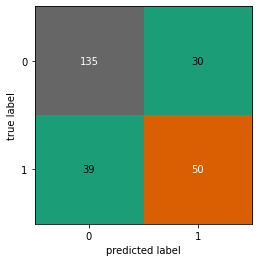

In [ ]:
#plots IMPORTS
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict), cmap=plt.cm.Dark2)
plt.show()

Adesso che abbiamo capito i vari indicatori, stampiamo il report dei vari indicatori:

In [ ]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

         0.0       0.78      0.82      0.80       165
         1.0       0.62      0.56      0.59        89

    accuracy                           0.73       254
   macro avg       0.70      0.69      0.69       254
weighted avg       0.72      0.73      0.72       254



# Decision Tree

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML 101.1-20230219T101028Z-001 (3)/ML 101.1/data/diabetes.txt')
df

,timespreg,gluctol,diaspb,triceps,insulin,massindex,pedigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
import numpy as np

dfnp = df.to_numpy()
x=dfnp[:,0:-1] # prendiamo tutti i dati tranne l'ultima colonna -> variabili indipendenti, osservazioni
y=dfnp[:,-1] # prendiamo solo l'ultima colonna -> variabile dipendente, target

In [ ]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, 
                                                    test_size =0.33, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y,
                                                    random_state= 123) #fix random seed for replicability

In [ ]:
X_train2.shape,y_train2.shape,X_test2.shape,y_test2.shape

((514, 8), (514,), (254, 8), (254,))

In [ ]:
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(criterion="gini", # criteri per stabilire come splittare
                                       max_depth=4, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=30, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=6, # numero dei nodi foglia
                                       min_samples_leaf=4 # numero di campioni per essere una foglia
                                      )

# prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
tree_clf.fit(X_train2,y_train2)

# seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
predict2 = tree_clf.predict(X_test2)

# visualizziamo il risultato (solo i primi dieci pazienti)
print(f'dati predetti dal metodo =                {predict[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test2[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [0. 0. 1. 0. 1. 0. 1. 0. 1. 1.]
dati reali presenti nel dataset di test = [1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]


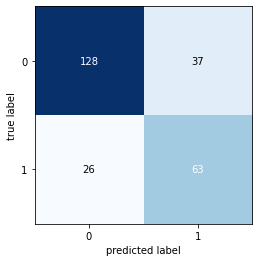

In [ ]:
#plots IMPORTS
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test2, predict2))
plt.show()

In [ ]:
print(classification_report(y_test2, predict2))

              precision    recall  f1-score   support

         0.0       0.78      0.78      0.78       165
         1.0       0.59      0.58      0.59        89

    accuracy                           0.71       254
   macro avg       0.68      0.68      0.68       254
weighted avg       0.71      0.71      0.71       254



**Confronto**


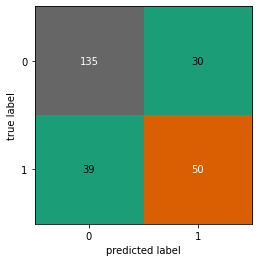

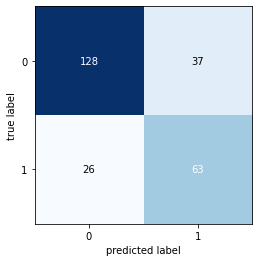

In [ ]:
plot_confusion_matrix(confusion_matrix(y_test, predict), cmap=plt.cm.Dark2) #KNN
plot_confusion_matrix(confusion_matrix(y_test2, predict2)) #Decision Tree

plt.show()

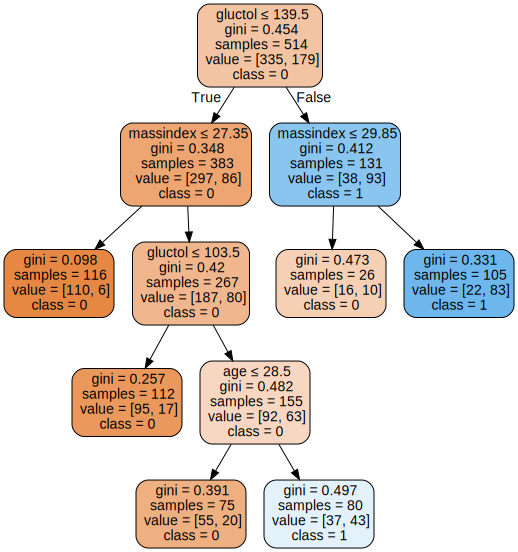

In [ ]:
#save the feature list into a vector (sono i nomi delle colonne del dataset)
features=list(df.columns.values)

import graphviz
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                     feature_names=features[0:-1],  
                     class_names=['0','1'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render('diabetes')
graph

In [ ]:
from sklearn.tree import export_text

r = export_text(tree_clf, feature_names=features[0:-1])
print(r)

|--- gluctol <= 139.50
|   |--- massindex <= 27.35
|   |   |--- class: 0.0
|   |--- massindex >  27.35
|   |   |--- gluctol <= 103.50
|   |   |   |--- class: 0.0
|   |   |--- gluctol >  103.50
|   |   |   |--- age <= 28.50
|   |   |   |   |--- class: 0.0
|   |   |   |--- age >  28.50
|   |   |   |   |--- class: 1.0
|--- gluctol >  139.50
|   |--- massindex <= 29.85
|   |   |--- class: 0.0
|   |--- massindex >  29.85
|   |   |--- class: 1.0



Dal confronto emerge che il metodo knn è più preciso per quanto riguarda chi non ha il diabete, mentre il metodo decision tree è più preciso nel rilevare chi ha il diabete